# Projeto 3: Otimizando Estratégias de E-Commerce com Análise de Dados

### Baixando as bibliotecas

In [2]:
%pip install pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 50.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 62.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Peter\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Importando as Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o pandas para exibir todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

In [5]:
try:
    df = pd.read_csv('data.csv', encoding='latin1')  # Usando encoding='latin1' para evitar erros de codificação
except FileNotFoundError:
    print("Arquivo data.csv não encontrado. Certifique-se de que o arquivo está no mesmo diretório do script.")
    # Aqui você pode incluir um código para sair do script ou fazer o upload do arquivo
except Exception as e:
    print(f"Erro ao ler o arquivo: {e}")
    # Aqui você pode incluir um código para tratar outros tipos de erro

## Passo 1: Compreensão do dataset

### Explorando o dataset

In [6]:
# Visualizando as primeiras linhas
print(df.head())

# Verificando as dimensões (linhas, colunas)
print(df.shape)

# Obtendo informações sobre os tipos de dados e valores ausentes
print(df.info())

# Resumo estatístico das variáveis numéricas
print(df.describe())

# Verificando a quantidade de valores únicos em cada coluna
print(df.nunique())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   

In [7]:
print(df.duplicated().sum())

5268


### Exibindo no modo tabelas

In [8]:
try:
    df = pd.read_csv('data.csv', encoding='latin1')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Erro: Arquivo data.csv não encontrado.")
    # Adicione lógica para parar ou tratar o erro
except Exception as e:
    print(f"Erro ao ler o arquivo: {e}")
    # Adicione lógica para parar ou tratar o erro

Dataset carregado com sucesso!


In [9]:
# Célula 2: Visualizar as primeiras linhas (renderiza como tabela)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Passo 2: Limpeza dos dados

In [11]:
# -- Passo 2: Limpeza e Preparação dos Dados --

# Criar uma cópia para não modificar o DataFrame original
df_cleaned = df.copy()

print(f"Shape original: {df_cleaned.shape}")

# 1. Tratar Valores Ausentes (CustomerID)
# Dada a importância do CustomerID para a segmentação e a grande quantidade de nulos,
# vamos remover as linhas onde CustomerID é nulo.
initial_rows = df_cleaned.shape[0]
df_cleaned.dropna(subset=['CustomerID'], inplace=True)
rows_after_customerid_nan = df_cleaned.shape[0]
print(f"Shape após remover CustomerID nulos: {df_cleaned.shape}")
print(f"Linhas removidas por CustomerID nulo: {initial_rows - rows_after_customerid_nan}")

# 2. Tratar Valores Ausentes (Description)
# Agora vamos tratar os poucos NAs restantes em Description
initial_rows = df_cleaned.shape[0]
df_cleaned.dropna(subset=['Description'], inplace=True)
rows_after_description_nan = df_cleaned.shape[0]
print(f"Shape após remover Description nulos: {df_cleaned.shape}")
print(f"Linhas removidas por Description nulo: {initial_rows - rows_after_description_nan}")

# 3. Remover Duplicatas
initial_rows = df_cleaned.shape[0]
df_cleaned.drop_duplicates(inplace=True)
rows_after_duplicates = df_cleaned.shape[0]
print(f"Shape após remover duplicatas: {df_cleaned.shape}")
print(f"Linhas duplicadas removidas: {initial_rows - rows_after_duplicates}")

# 4. Converter Tipos de Dados
# Converter InvoiceDate para datetime
try:
    df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], format='%m/%d/%Y %H:%M')
except ValueError as e:
    print(f"Erro ao converter InvoiceDate: {e}")
    # Poderíamos tentar inferir o formato ou tratar erros específicos aqui se necessário
    df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate']) # Tenta inferir

# Converter CustomerID para string (mais seguro para IDs)
# Primeiro para Int64 para garantir que é inteiro, depois para string
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype('Int64')
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(str)

print("\nInformações do DataFrame após conversão de tipos:")
df_cleaned.info()

# 5. Investigar e Tratar Valores Inconsistentes
# Verificar Quantidade Negativa (Cancelamentos)
print("\nAnálise de Quantidade Negativa:")
negative_quantity = df_cleaned[df_cleaned['Quantity'] < 0]
print(f"Total de linhas com Quantidade negativa: {len(negative_quantity)}")
# Verificar se essas linhas correspondem a cancelamentos (InvoiceNo começando com 'C')
cancelled_invoices = negative_quantity[negative_quantity['InvoiceNo'].astype(str).str.startswith('C')]
print(f"Linhas com Quantidade negativa e InvoiceNo começando com 'C': {len(cancelled_invoices)}")
# Criar uma coluna para identificar cancelamentos
df_cleaned['IsCancelled'] = df_cleaned['InvoiceNo'].astype(str).str.startswith('C')
print("\nContagem de Cancelamentos (IsCancelled):")
print(df_cleaned['IsCancelled'].value_counts())

# Verificar UnitPrice igual a zero
print("\nAnálise de UnitPrice igual a zero:")
zero_price = df_cleaned[df_cleaned['UnitPrice'] == 0]
print(f"Total de linhas com UnitPrice igual a zero: {len(zero_price)}")
# Decisão: Remover essas linhas, pois não representam vendas monetárias válidas para a maioria das análises.
initial_rows = df_cleaned.shape[0]
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]
rows_after_zero_price = df_cleaned.shape[0]
print(f"Shape após remover UnitPrice zero: {df_cleaned.shape}")
print(f"Linhas removidas por UnitPrice zero: {initial_rows - rows_after_zero_price}")


# 6. Criar Novas Variáveis (Feature Engineering)
# Criar TotalPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Extrair componentes da data
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour
df_cleaned['Weekday'] = df_cleaned['InvoiceDate'].dt.dayofweek # Monday=0, Sunday=6
df_cleaned['MonthYear'] = df_cleaned['InvoiceDate'].dt.to_period('M') # Para agrupar por mês/ano

print("\nNovas colunas criadas (TotalPrice e componentes de data).")

# Verificar o resultado final da limpeza
print("\n--- Resumo Final da Limpeza ---")
print(f"Shape final do DataFrame limpo: {df_cleaned.shape}")
print("\nVerificação de valores nulos restantes:")
print(df_cleaned.isnull().sum())
print("\nTipos de dados finais:")
df_cleaned.info()
print("\nPrimeiras 5 linhas do DataFrame limpo:")
print(df_cleaned.head())
print("\nResumo estatístico das colunas numéricas (incluindo TotalPrice):")
print(df_cleaned.describe())

Shape original: (541909, 8)
Shape após remover CustomerID nulos: (406829, 8)
Linhas removidas por CustomerID nulo: 135080
Shape após remover Description nulos: (406829, 8)
Linhas removidas por Description nulo: 0
Shape após remover duplicatas: (401604, 8)
Linhas duplicadas removidas: 5225

Informações do DataFrame após conversão de tipos:
<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), objec

### Passo 3: Análise Exploratória de Dados (EDA)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização (opcional, mas melhora a aparência)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Define um tamanho padrão para as figuras

# -- Passo 3: Análise Exploratória de Dados (EDA) --

# Filtrar cancelamentos para análise de vendas
# Usaremos df_cleaned que já tem IsCancelled
df_sales = df_cleaned[df_cleaned['IsCancelled'] == False].copy()
print(f"Shape do DataFrame para análise de vendas (sem cancelamentos): {df_sales.shape}")
print(f"Shape original limpo (incluindo cancelamentos): {df_cleaned.shape}")
print(f"Número de transações de venda: {len(df_sales)}")
print(f"Número de transações de cancelamento: {len(df_cleaned) - len(df_sales)}")

Shape do DataFrame para análise de vendas (sem cancelamentos): (392692, 16)
Shape original limpo (incluindo cancelamentos): (401564, 16)
Número de transações de venda: 392692
Número de transações de cancelamento: 8872



--- Análise de Vendas Temporais ---


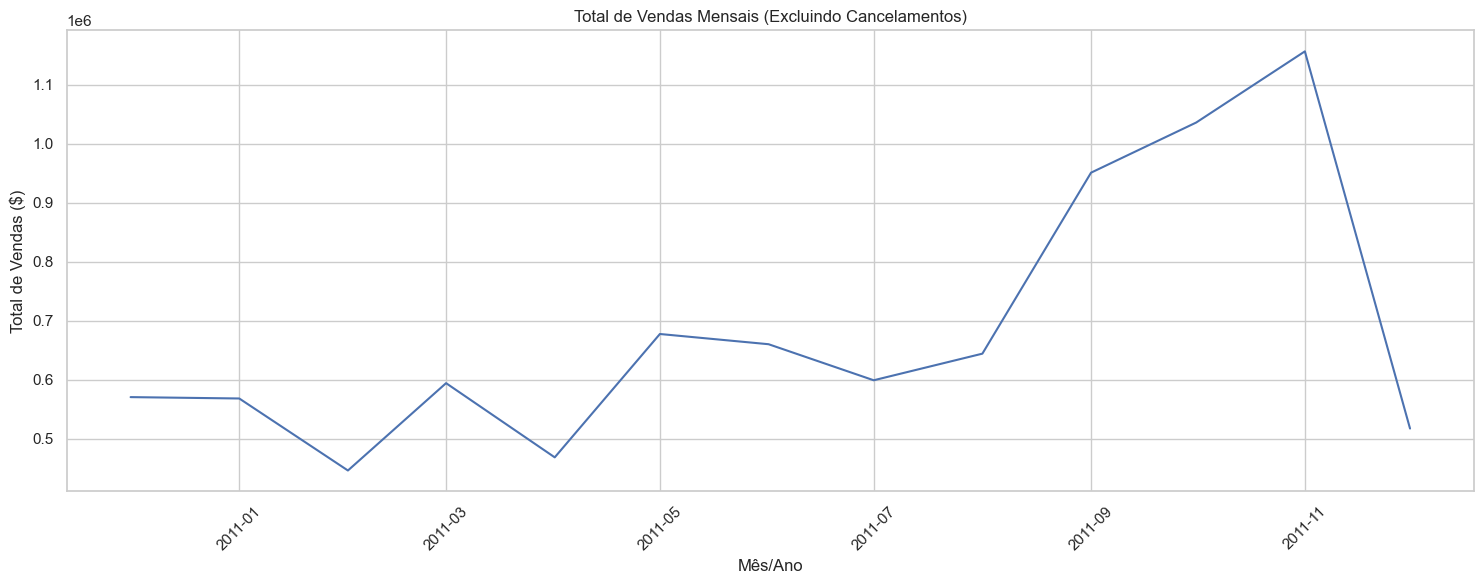

In [15]:
# 1. Análise de Vendas ao Longo do Tempo

# Agrupar por Mês/Ano e calcular o total de vendas
# Usando a coluna MonthYear que já é do tipo Period
monthly_sales = df_sales.groupby('MonthYear')['TotalPrice'].sum()

# Converter o índice Period para Datetime para plotagem mais flexível
monthly_sales.index = monthly_sales.index.to_timestamp()

# Visualização - Vendas Mensais
print("\n--- Análise de Vendas Temporais ---")
plt.figure(figsize=(15, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Total de Vendas Mensais (Excluindo Cancelamentos)')
plt.xlabel('Mês/Ano')
plt.ylabel('Total de Vendas ($)')
plt.xticks(rotation=45) # Rotaciona os labels do eixo X para melhor leitura
plt.grid(True)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()



C:\Users\Peter\AppData\Local\Temp\ipykernel_23324\1390755.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette="viridis")


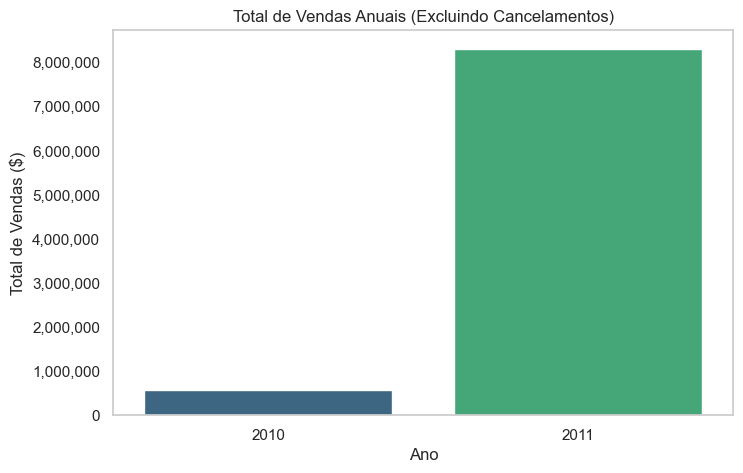

In [19]:
# Agrupar por Ano para ver crescimento anual
yearly_sales = df_sales.groupby('Year')['TotalPrice'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette="viridis")
plt.title('Total de Vendas Anuais (Excluindo Cancelamentos)')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas ($)')
# Formatando o eixo Y para melhor leitura de valores monetários
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='y')
plt.show()




C:\Users\Peter\AppData\Local\Temp\ipykernel_23324\4038677382.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_pattern.index, y=monthly_pattern.values, palette="magma")


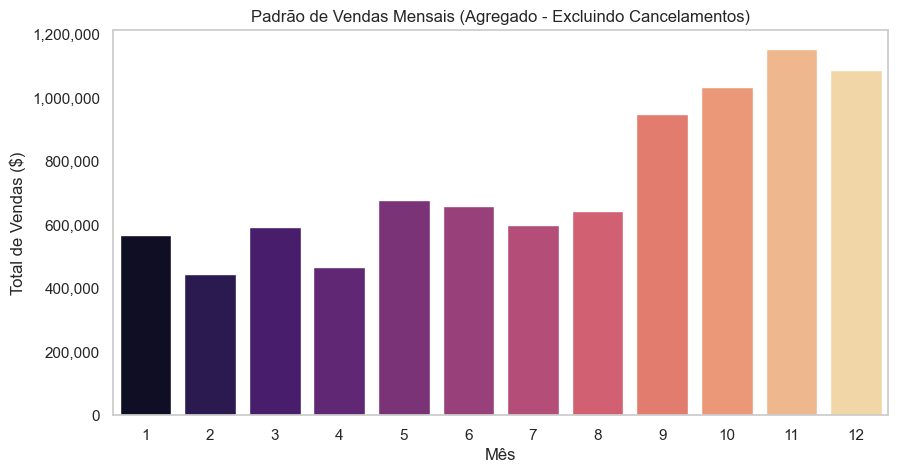

In [18]:
# Agrupar por Mês (agregando todos os anos) para ver sazonalidade mensal
monthly_pattern = df_sales.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_pattern.index, y=monthly_pattern.values, palette="magma")
plt.title('Padrão de Vendas Mensais (Agregado - Excluindo Cancelamentos)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas ($)')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='y')
plt.show()



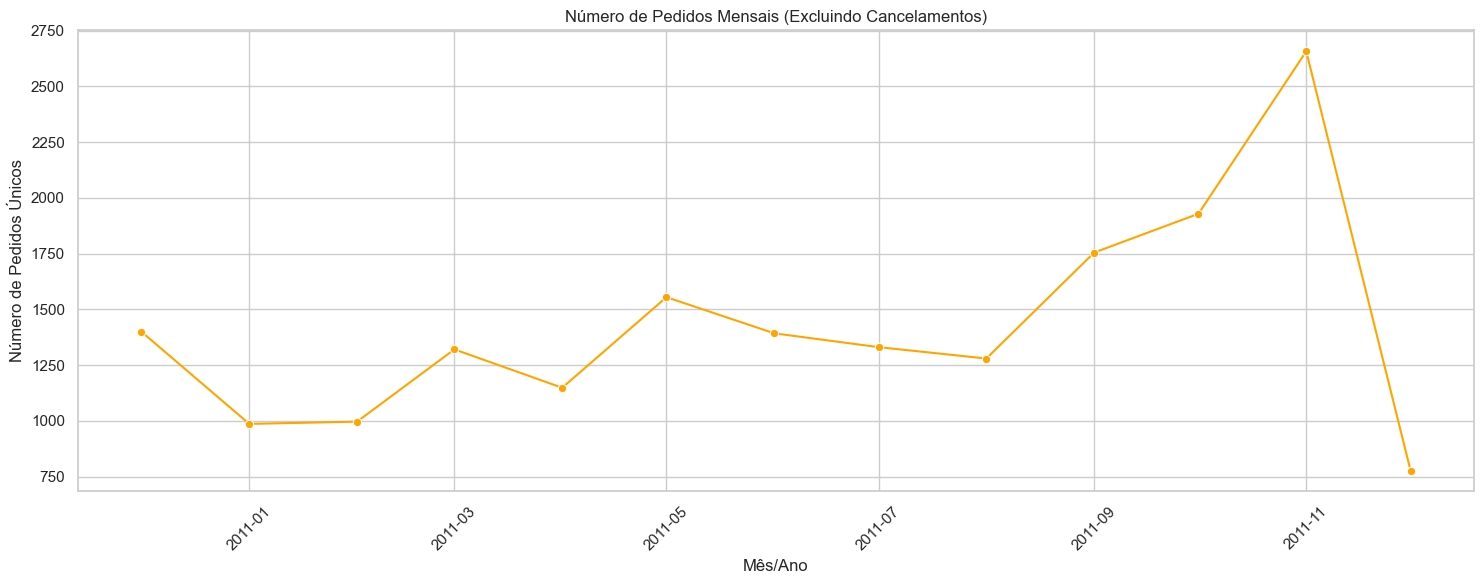


--- Análise de Vendas Geográficas ---

Top 10 Países por Total de Vendas:
Country
United Kingdom    $7,285,024.64
Netherlands         $285,446.34
EIRE                $265,262.46
Germany             $228,678.40
France              $208,934.31
Australia           $138,453.81
Spain                $61,558.56
Switzerland          $56,443.95
Belgium              $41,196.34
Sweden               $38,367.83
Name: TotalPrice, dtype: object


In [26]:
# (Opcional mas útil) Analisar número de pedidos ao longo do tempo
# Um pedido é único por InvoiceNo
monthly_orders = df_sales.groupby('MonthYear')['InvoiceNo'].nunique()
monthly_orders.index = monthly_orders.index.to_timestamp()

plt.figure(figsize=(15, 6))
sns.lineplot(x=monthly_orders.index, y=monthly_orders.values, color='orange', marker='o')
plt.title('Número de Pedidos Mensais (Excluindo Cancelamentos)')
plt.xlabel('Mês/Ano')
plt.ylabel('Número de Pedidos Únicos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Análise de Vendas por País
print("\n--- Análise de Vendas Geográficas ---")
# Calcular vendas totais por país e ordenar
country_sales = df_sales.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

print("\nTop 10 Países por Total de Vendas:")
# Formatando para melhor visualização
print(country_sales.head(10).apply(lambda x: f"${x:,.2f}"))


C:\Users\Peter\AppData\Local\Temp\ipykernel_23324\3097795854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_sales.head(10).index, x=country_sales.head(10).values, palette="Spectral", orient='h')


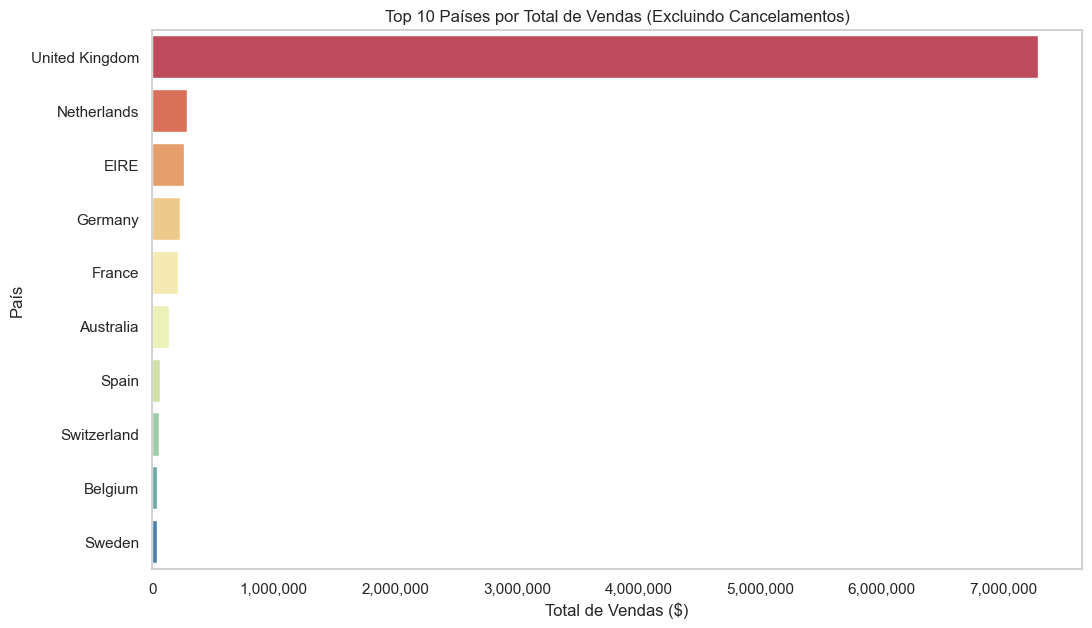

In [27]:
# Visualização dos Top 10 países
plt.figure(figsize=(12, 7))
# Usando o objeto Series diretamente com seaborn
sns.barplot(y=country_sales.head(10).index, x=country_sales.head(10).values, palette="Spectral", orient='h')
plt.title('Top 10 Países por Total de Vendas (Excluindo Cancelamentos)')
plt.xlabel('Total de Vendas ($)')
plt.ylabel('País')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='x')
plt.show()



C:\Users\Peter\AppData\Local\Temp\ipykernel_23324\537067166.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_sales_no_uk.head(10).index, x=country_sales_no_uk.head(10).values, palette="coolwarm", orient='h')


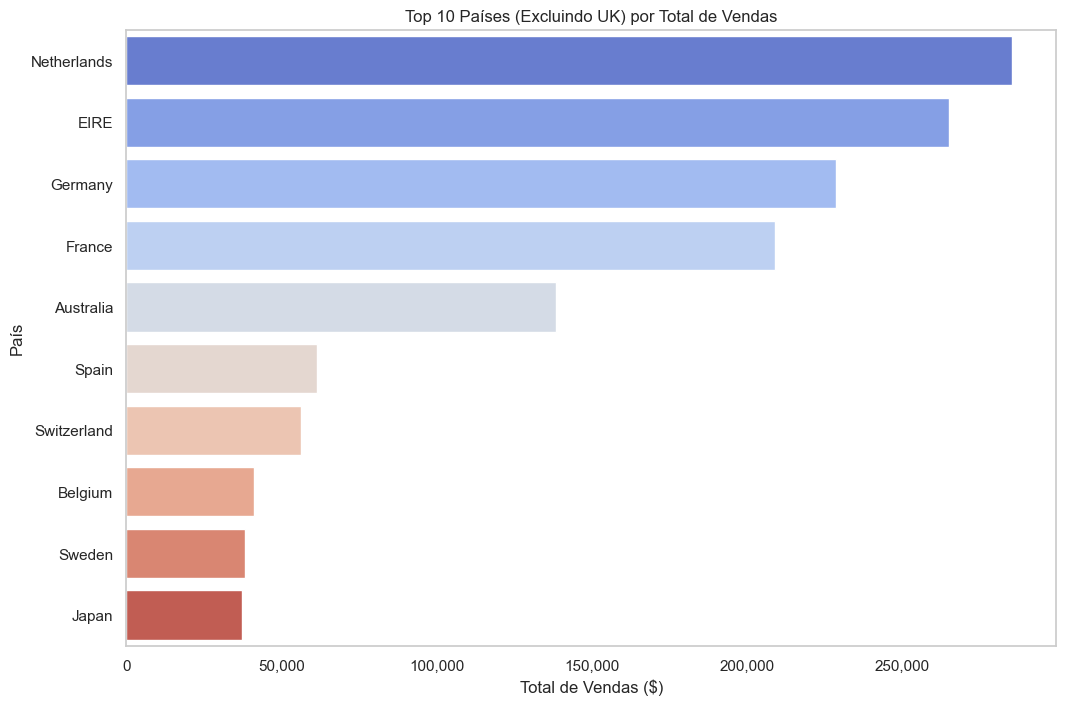


Análise temporal e geográfica concluída. Próximo passo: análise de produtos.


In [25]:
# Visualização sem UK para melhor escala dos outros
country_sales_no_uk = country_sales[1:] # Exclui o primeiro (UK)

plt.figure(figsize=(12, 8))
# Pegando os top 10 do restante
sns.barplot(y=country_sales_no_uk.head(10).index, x=country_sales_no_uk.head(10).values, palette="coolwarm", orient='h')
plt.title('Top 10 Países (Excluindo UK) por Total de Vendas')
plt.xlabel('Total de Vendas ($)')
plt.ylabel('País')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='x')
plt.show()

print("\nAnálise temporal e geográfica concluída. Próximo passo: análise de produtos.")